## Problem Statement: Concrete Strength Prediction

### Objective 
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

### Attribute Information:
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

   Name       	                           Data Type	    Measurement	            Description
1. Cement (cement)	                        quantitative	kg in a m3 mixture	    Input Variable
2. Blast Furnace Slag (slag)	            quantitative	kg in a m3 mixture	    Input Variable
3. Fly Ash (ash)	                        quantitative	kg in a m3 mixture	    Input Variable
4. Water(water)	                            quantitative	kg in a m3 mixture	    Input Variable
5. Superplasticizer (superplastic)	        quantitative	kg in a m3 mixture	    Input Variable
6. Coarse Aggregate (coarseagg)	            quantitative	kg in a m3 mixture	    Input Variable
7. Fine Aggregate (fineagg)	                quantitative	kg in a m3 mixture	    Input Variable
8. Age(age)	                                quantitative	Day (1~365)	            Input Variable
9. Concrete compressive strength(strength)	quantitative	MPa	                    Output Variable



### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from scipy.stats import randint as sp_randint

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(color_codes=True)

In [2]:
concrete_Data = pd.read_csv('concrete.csv')

In [3]:
concrete_Data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Univariate Analysis

In [4]:
concrete_Data.shape

(1030, 9)

In [5]:
concrete_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Insights:
1. There are 1030 rows and 9 columns.
2. There is no null values.
3. All the variables are float64 except age which is int64.

In [6]:
concrete_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
concrete_Data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

### Insights:
1. All variables are right skewed except coarseagg,fineagg(which are left skewed).
2. Most skewed variable is age.
3. cement: There are outliers.
4. slag: There are outliers.
5. ash: No outlier.
6. water: There are outliers.
7. superplastic: There are outliers.
8. coarseagg: No outlier.
9. fineagg: There are outliers.
10. age: There are outliers.
11. strength: No outlier.
12. There are some zero for ash,slag,superplastic but it is possible value if we don't add them to mixture.

In [8]:
concrete_Data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There is no null value.

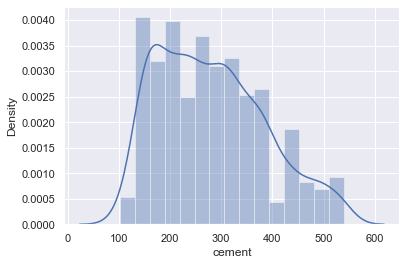

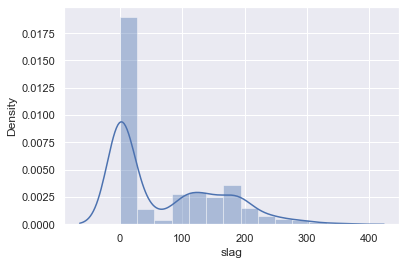

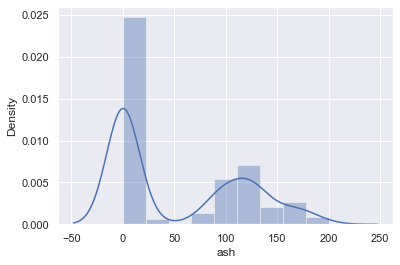

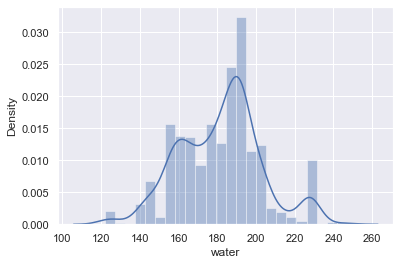

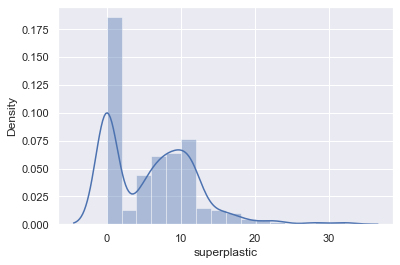

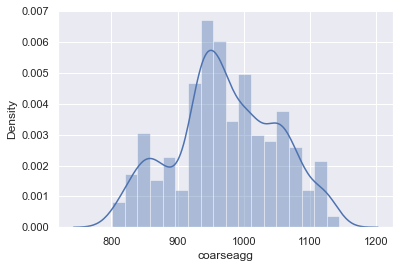

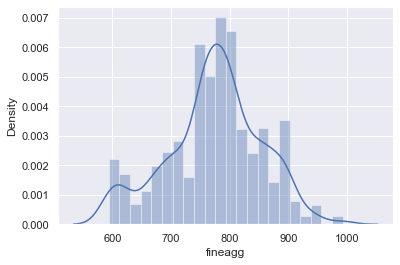

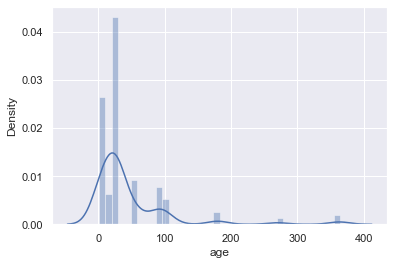

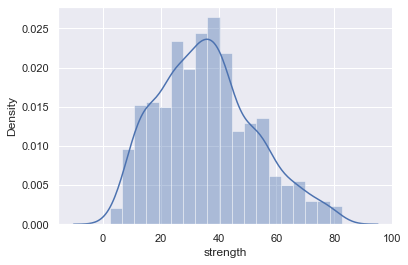

In [9]:
for i in concrete_Data.columns:
    sns.distplot(concrete_Data[i]);
    plt.show()

In [10]:
concrete_Data['ash'].value_counts()

0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
119.0      1
134.0      1
95.0       1
130.0      1
129.7      1
Name: ash, Length: 156, dtype: int64

In [11]:
concrete_Data['slag'].value_counts()

0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
161.0      1
160.5      1
129.0      1
100.6      1
209.0      1
Name: slag, Length: 185, dtype: int64

In [12]:
concrete_Data.duplicated().sum()

25

There are 25 duplicate rows.

In [13]:
concrete_Data.drop_duplicates(inplace=True) # remove duplicate rows

In [14]:
concrete_Data.shape

(1005, 9)

### Bivariate Analysis

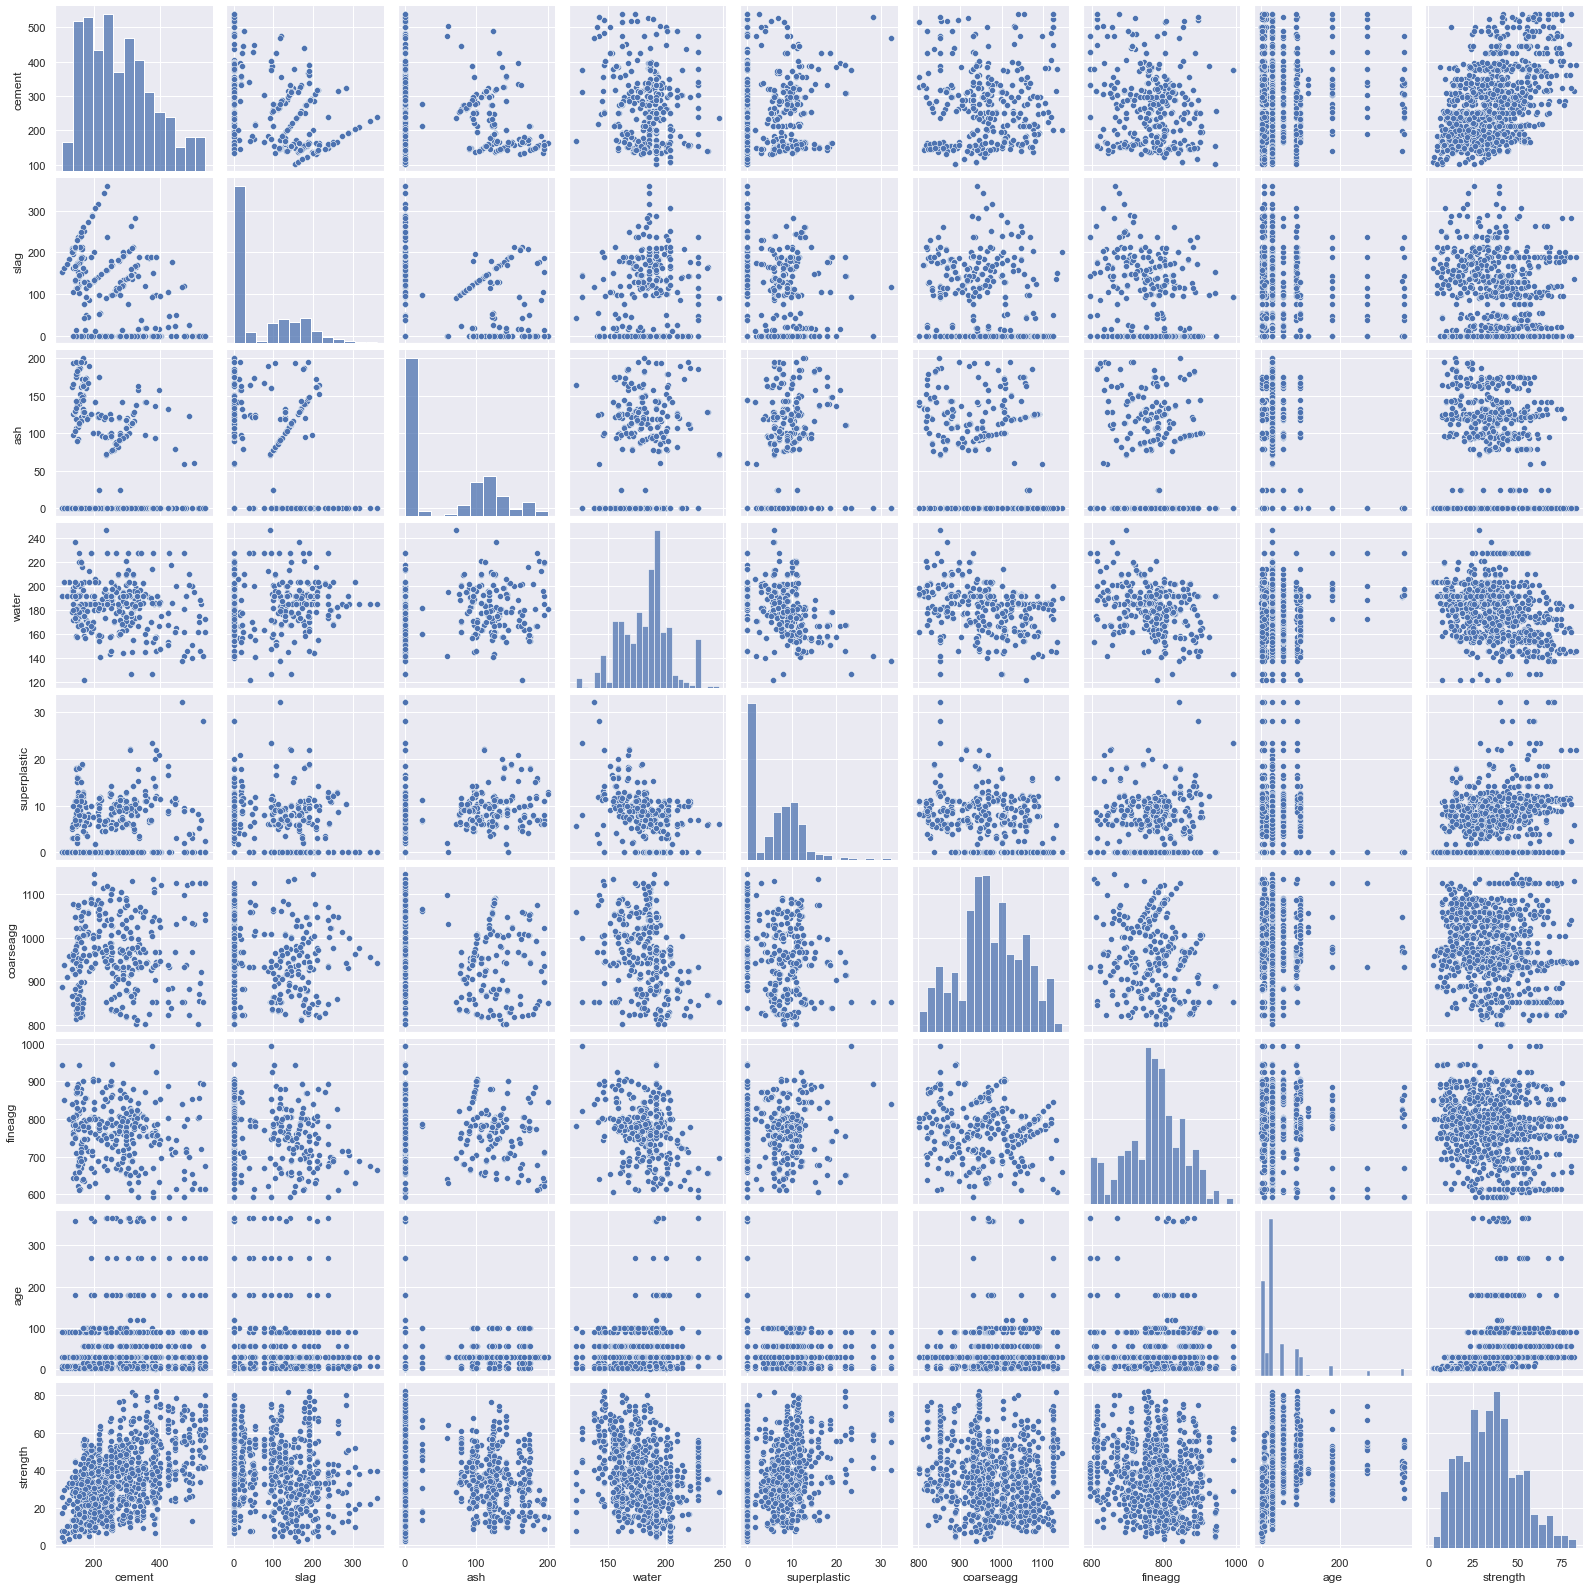

In [15]:
sns.pairplot(concrete_Data);

cement has positive correlation with strength.

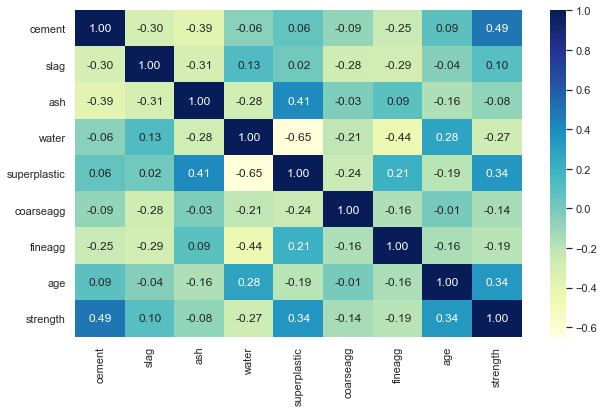

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(concrete_Data.corr(),annot=True,fmt='.2f',cmap='YlGnBu');

### Insights:
1. strength is most correlated with cement, followed by superplastic,age.
2. Superplastic and age shows same correlation with strength, so we can drop any one of them.Let's drop superplastic.

In [17]:
concrete_Data['age'].unique()

array([ 28,  14,  90,   7,  56,   3, 100,  91, 180, 365, 270, 360, 120,
         1], dtype=int64)

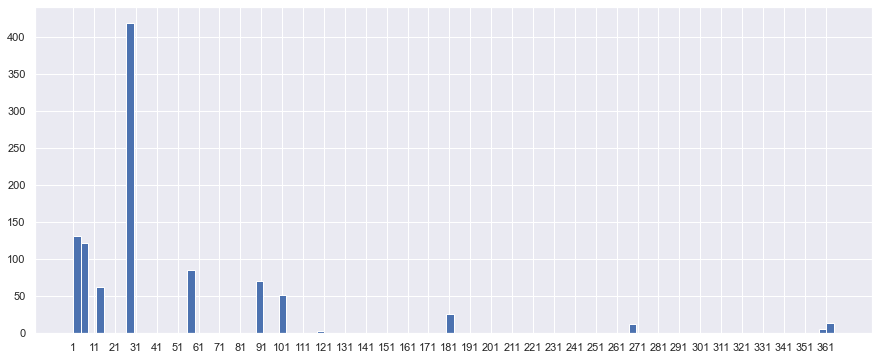

In [18]:
plt.figure(figsize=(15,6))
plt.hist(concrete_Data['age'], bins=100);
x = concrete_Data['age']
plt.xticks(np.arange(min(x), max(x)+1, 10));

In [19]:
concrete_Data['age'].value_counts()

28     419
3      129
7      122
56      86
14      62
90      54
100     52
180     26
91      17
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

### Split the data into training and test set

In [20]:
X = concrete_Data.drop(['strength','superplastic'],axis=1)
y = concrete_Data['strength']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
from sklearn.feature_selection import SelectKBest,f_regression
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.sort_values(by='Score',ascending=False)

,Specs,Score
0,cement,264.350566
6,age,89.087880
3,water,49.276269
5,fineagg,28.172111
4,coarseagg,16.554462
2,ash,12.640837
1,slag,8.936298


In [23]:
X_train.head()

,cement,slag,ash,water,coarseagg,fineagg,age
443,190.3,0.0,125.2,166.6,1079.0,798.9,56
689,194.7,0.0,100.5,165.6,1006.4,905.9,56
1022,144.8,0.0,133.6,180.8,979.5,811.5,28
826,139.7,163.9,127.7,236.7,868.6,655.6,28
758,194.7,0.0,100.5,170.2,998.0,901.8,56


In [24]:
methods= []
training = []
validation = []
testing = []

In [25]:
def evalScores(model,X_train,y_train,cv):
    scores = cross_val_score(model, X_train, y_train, cv=cv,n_jobs=-1)
    meanScore = np.round(scores.mean(),2)
    trainingScore = np.round(model.score(X_train,y_train),2)
    print('Training score:',trainingScore)
    print("Testing score:",meanScore)
    print("Standard Deviation of Scores",np.round(scores.std(),2))
    training.append(trainingScore)
    validation.append(meanScore)

### Lasso Regression

In [26]:
pipe_lasso = make_pipeline(StandardScaler(),Lasso(alpha=0.2))
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.2))])

In [27]:
kfold = KFold(n_splits=10,shuffle=True,random_state=1)

evalScores(pipe_lasso, X_train, y_train, kfold)
methods.append('Lasso Regression')

Training score: 0.61
Testing score: 0.6
Standard Deviation of Scores 0.06


In [28]:
coeffs = pd.DataFrame(pipe_lasso[1].coef_)
features = pd.DataFrame(X_train.columns)
featureCoeffs = pd.concat([features,coeffs],axis=1)
featureCoeffs.columns = ['Features','Coeffs'] 
featureCoeffs.sort_values(by='Coeffs',ascending=False)

,Features,Coeffs
0,cement,11.161200
1,slag,6.872634
6,age,6.808299
2,ash,4.155170
5,fineagg,0.000000
4,coarseagg,-0.438640
3,water,-5.419456


In [29]:
pipe_lasso_poly = make_pipeline(StandardScaler(),PolynomialFeatures(degree = 2, interaction_only=True),Lasso(alpha=0.2))
pipe_lasso_poly.fit(X_train,y_train)
evalScores(pipe_lasso_poly, X_train, y_train, kfold)
methods.append('Lasso Regression with Poly features')

Training score: 0.72
Testing score: 0.68
Standard Deviation of Scores 0.06


Lasso regression is performing well with polynomial features.

In [30]:
pipe_lasso_poly[2].coef_

array([ 0.        , 11.53550713,  7.65318311,  4.77949151, -4.93085575,
       -0.75241278, -0.        , 12.49777222,  0.71830881,  0.04543809,
       -0.68545965,  0.        ,  0.51948841, -0.        ,  0.50658229,
       -0.50499062, -0.07663307,  1.66609748,  1.27310949,  0.16625883,
        0.46398945,  1.60013654,  4.03866702, -1.33819673, -0.02318089,
       -2.84888375,  0.52449872, -0.28707089,  0.        ])

### SVR

In [31]:
pipe_svr = make_pipeline(StandardScaler(),SVR(kernel='rbf',C=100, epsilon=.1))
pipe_svr.fit(X_train,y_train)
evalScores(pipe_svr, X_train, y_train, kfold)
methods.append('SVR_rbf')

Training score: 0.93
Testing score: 0.87
Standard Deviation of Scores 0.03


### Random Forest Regressor

In [32]:
rf_model = RandomForestRegressor(random_state=7,n_estimators=50,max_features='sqrt')
rf_model.fit(X_train,y_train)

evalScores(rf_model, X_train, y_train, kfold)
methods.append('Random Forest')

Training score: 0.98
Testing score: 0.88
Standard Deviation of Scores 0.03


In [33]:
df = pd.DataFrame(rf_model.feature_importances_,columns=['Feature Imp'])
df['Feature'] = X_train.columns
df.sort_values(by=['Feature Imp'],ascending=False)

,Feature Imp,Feature
6,0.326803,age
0,0.239066,cement
3,0.145957,water
4,0.081185,coarseagg
5,0.079108,fineagg
1,0.072543,slag
2,0.055338,ash


### Gradient Boost Regressor

In [34]:
gb_model = GradientBoostingRegressor(random_state=1,n_estimators=50)
gb_model.fit(X_train,y_train)
evalScores(gb_model, X_train, y_train, kfold)
methods.append('Gradient Boost')

Training score: 0.91
Testing score: 0.86
Standard Deviation of Scores 0.04


In [35]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame(columns=['Method','Training score','Validation score'])
resultsDf['Method'] = methods
resultsDf['Training score'] = training
resultsDf['Validation score'] = validation
resultsDf

,Method,Training score,Validation score
0,Lasso Regression,0.61,0.60
1,Lasso Regression with Poly features,0.72,0.68
2,SVR_rbf,0.93,0.87
3,Random Forest,0.98,0.88
4,Gradient Boost,0.91,0.86


### Let's use RandomizedSearchCV to hypertune the parameters

In [36]:
param_rf = {"n_estimators": sp_randint(10,100),
              "max_depth": [3,4,5,6,7],
              "max_features": ['auto','sqrt'],
             "random_state": [1,7,21,42]
              }

In [37]:
samples = 10   
randomCV = RandomizedSearchCV(rf_model, param_distributions=param_rf, n_iter=samples,cv=5)

In [38]:
randomCV.fit(X_train, y_train)
print(randomCV.best_params_)

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 84, 'random_state': 1}


In [39]:
rf_model_tuned = RandomForestRegressor(n_estimators=84,random_state=1,max_features='auto',max_depth=7)

In [40]:
rf_model_tuned.fit(X_train,y_train)
evalScores(rf_model_tuned, X_train, y_train, kfold)
methods.append('Random Forest Tuned')

Training score: 0.94
Testing score: 0.87
Standard Deviation of Scores 0.03


In [41]:
param_gb = {  "n_estimators": sp_randint(10,100),
              "learning_rate":[0.1,0.2,0.3,0.4,0.5],
              "random_state": [1,7,21,42]
              }


In [42]:
samples = 10   
randomCV_gb = RandomizedSearchCV(gb_model, param_distributions=param_gb, n_iter=samples,cv=5)

In [43]:
randomCV_gb.fit(X_train, y_train)
print(randomCV_gb.best_params_)

{'learning_rate': 0.3, 'n_estimators': 85, 'random_state': 42}


In [44]:
gb_model_tuned = GradientBoostingRegressor(random_state=42,learning_rate=0.3,n_estimators=85)
gb_model_tuned.fit(X_train,y_train)
evalScores(gb_model_tuned, X_train, y_train, kfold)
methods.append('Gradient Boost hyper tuned')

Training score: 0.97
Testing score: 0.9
Standard Deviation of Scores 0.03


In [45]:
resultsDf1 = pd.DataFrame(columns=['Method','Training score','Validation score'])
resultsDf1['Method'] = methods
resultsDf1['Training score'] = training
resultsDf1['Validation score'] = validation
resultsDf1

,Method,Training score,Validation score
0,Lasso Regression,0.61,0.60
1,Lasso Regression with Poly features,0.72,0.68
2,SVR_rbf,0.93,0.87
3,Random Forest,0.98,0.88
4,Gradient Boost,0.91,0.86
5,Random Forest Tuned,0.94,0.87
6,Gradient Boost hyper tuned,0.97,0.90


### Let's test the model using test data

In [46]:
models = [pipe_lasso,pipe_lasso_poly,pipe_svr,rf_model,gb_model,rf_model_tuned,gb_model_tuned]
resultsDf1['Testing score'] = 0.0
i = 0
for model in models:
    resultsDf1.iloc[i,3] = np.round(model.score(X_test,y_test),2)
    i += 1
resultsDf1

,Method,Training score,Validation score,Testing score
0,Lasso Regression,0.61,0.60,0.55
1,Lasso Regression with Poly features,0.72,0.68,0.66
2,SVR_rbf,0.93,0.87,0.84
3,Random Forest,0.98,0.88,0.88
4,Gradient Boost,0.91,0.86,0.86
5,Random Forest Tuned,0.94,0.87,0.86
6,Gradient Boost hyper tuned,0.97,0.90,0.92


### Insight:
Gradient Boost hyper tuned model is giving us best results (92% test accuracy). We can use this model.